# Opinions of the Star Wars Film Franchise

A decade after the release of Star Wars: Revenge of the Sith, Disney sought to build upon main storyline of this classic sci-fi series with it's seventh installment, Star Wars: The Force Awakens. In anticipation of the movie, FiveThirtyEight conducted an online survey through SurveyMonkey to assess the America's sentiments towards the series so far. The survey was limited to the six main films and did not include other media such as comic books, television series, etc.

The data collected from the survey can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

Based on the survey results, we will try to determine how the respondents ranked the series' first six films and its pivotal characters.

Results
Among the first six films of the film franchise, The Empire Strikes Back, ranked at the top for both most viewed and best movie. From the characters, Luke Skywalker was the most favored while Jar Jar Binks was the least favored.

In [140]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv(r"C:\Users\jdgoe\Downloads\Data Fun\StarWars.csv", encoding='ISO-8859-1')
pd.options.display.max_columns = 50

# Cleaning Data Set

In [141]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The first row is just an eextended description of the columns so we will seperate it from the main dataframe

In [142]:
# keep first row of df as reference
options = star_wars.iloc[0:1,:]
options

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


In [143]:
#drop first row from df
star_wars = star_wars.drop(index=0)

In [144]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [145]:
# Convert yes/no answers into boolean array
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [146]:
import numpy as np

#Long Version#
# movie_mapping = {
#     "Star Wars: Episode I  The Phantom Menace": True,
#     np.nan: False,
#     "Star Wars: Episode II  Attack of the Clones": True,
#     "Star Wars: Episode III  Revenge of the Sith": True,
#     "Star Wars: Episode IV  A New Hope": True,
#     "Star Wars: Episode V The Empire Strikes Back": True,
#     "Star Wars: Episode VI Return of the Jedi": True
# }

# for col in star_wars.columns[3:9]:
#     star_wars[col] = star_wars[col].map(movie_mapping)
## Short Version ##
movie_names = list(star_wars.iloc[0,3:9])

movie_names

# Create a function that replaces a movie title with True and other values with False
def replace(movie):
    if movie in movie_names:
        return True
    else:
        return False

star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].applymap(replace) # Apply the function to the appropriate columns

We create a function, replace(), which will change a cell's content to either True if it contains a film title, or False if otherwise. This function is passed on to the DataFrame.applymap() method to work on the relevant columns.

In [147]:
# star_wars = star_wars.rename(columns={
#         "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
#         "Unnamed: 4": "seen_2",
#         "Unnamed: 5": "seen_3",
#         "Unnamed: 6": "seen_4",
#         "Unnamed: 7": "seen_5",
#         "Unnamed: 8": "seen_6"
#         })

# star_wars.head()
# Store the current column names as a list in seen_cols
seen_cols = star_wars.columns[3:9]

seen_cols

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

To replace our column names, we need to create a dictionary, which will contain the current names as the keys and the replacement names as the corresponding values.

In [148]:
# Create a dictionary to contain replacement names for the checkbox (seen movies) columns
seen_dict = {}

n = 0
for seen in seen_cols:
    n += 1
    seen_dict[seen] = 'seen_{0}'.format(n)
    
seen_dict

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'}

In [149]:
#replace column names with new dictionary
star_wars.rename(columns=seen_dict, inplace=True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Ranking Columns

The next six columns after the checkbox columns let the respondent rank the movies according to preference. Since there are six movies, each movie is ranked on a scale of 1-6, with 1 being the highest.

In [150]:
# Convert ranking columns into numeric value
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [151]:
# Store the column names as a list in rank_cols
rank_cols = star_wars.columns[9:15]

# Create a dictionary to contain replacement names for the ranking columns
rank_dict = {}
n = 0
for rank in rank_cols:
    n += 1
    rank_dict[rank] = 'ranking_{}'.format(n)
    

# Replace the column names of the ranking columns
star_wars.rename(columns=rank_dict, inplace=True)

star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [152]:
# Find mean rank of each movie
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Text(0.5, 1.0, 'Average Overall Ranking')

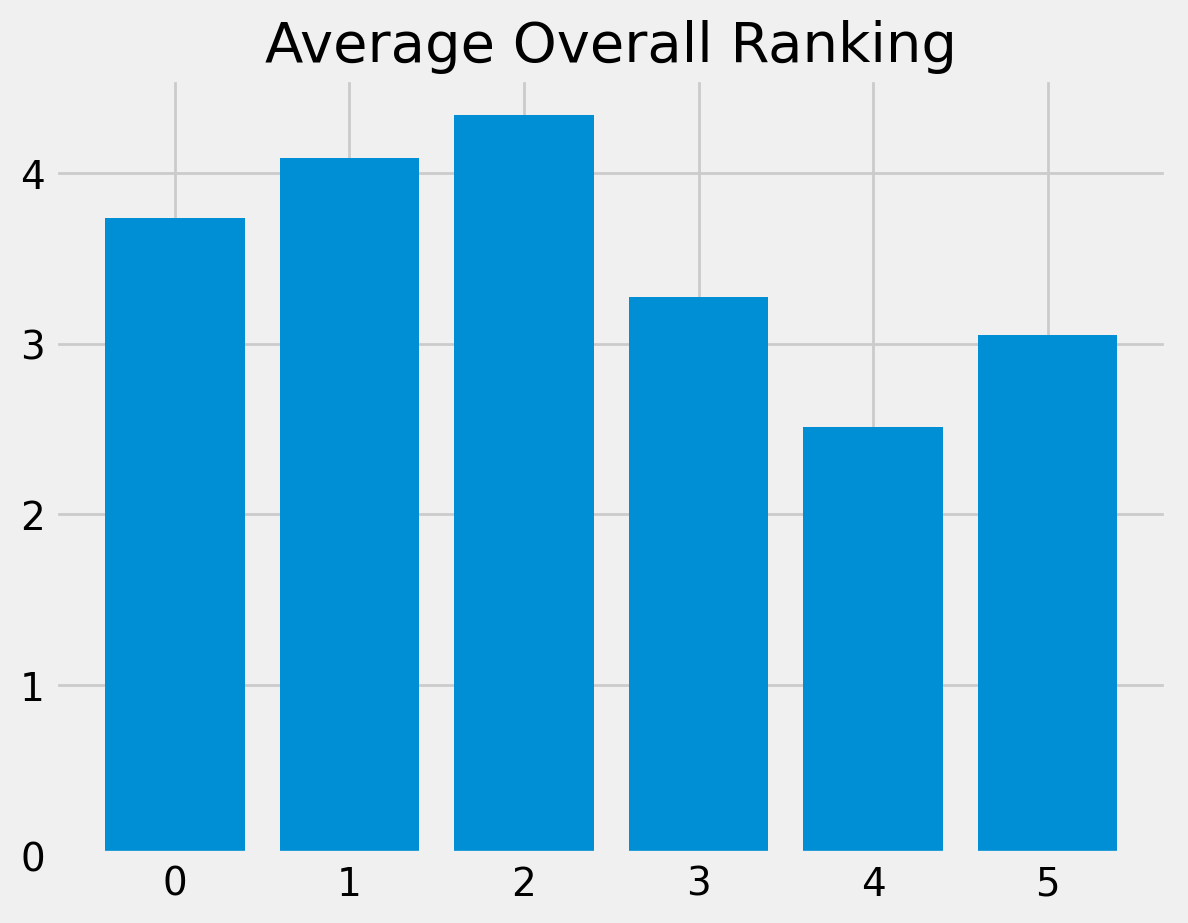

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.title('Average Overall Ranking')

# Character Columns

In [154]:
star_wars.iloc[:,15].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

For easier visualization, we can divide these ratings into four parts:

1. Favorable
2. Unfavorable
3. Neutral
4. Unfamiliar


In [155]:
import numpy as np

# Dictionary containing replacement values for favorability ratings
favor_ratings = {
                'Very favorably' : 1,
                'Somewhat favorably' : 1,
                'Neither favorably nor unfavorably (neutral)' : 3,
                'Somewhat unfavorably' : 2,
                'Very unfavorably' : 2,
                'Unfamiliar (N/A)' : 4, 
                np.nan : 4
                }

# Replace favorability ratings with corresponding numeric or NaN value
for n in range(15,29):
    star_wars.iloc[:,n] = star_wars.iloc[:,n].map(favor_ratings)

In [156]:
# Dictionary containing replacement names for character column names
char_dict = {
            'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
            'Unnamed: 16': 'Luke Skywalker',
            'Unnamed: 17': 'Princess Leia Organa',
            'Unnamed: 18': 'Anakin Skywalker',
            'Unnamed: 19': 'Obi Wan Kenobi',
            'Unnamed: 20': 'Emperor Palpatine',
            'Unnamed: 21': 'Darth Vader',
            'Unnamed: 22': 'Lando Calrissian',
            'Unnamed: 23': 'Boba Fett',
            'Unnamed: 24': 'C-3P0',
            'Unnamed: 25': 'R2 D2',
            'Unnamed: 26': 'Jar Jar Binks',
            'Unnamed: 27': 'Padme Amidala',
            'Unnamed: 28': 'Yoda'
            }

# Replace column names of character columns
star_wars.rename(columns=char_dict, inplace=True)

In [157]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,1,1,1,1,1,1,1,4,4,1,1,1,1,1,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,1,1,1,1,1,4,4,4,4,4,4,4,4,4,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,1,1,1,1,1,1,1,1,2,1,1,1,1,1,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,1,1,1,2,1,2,1,3,1,1,1,2,1,1,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In our visualization, we will only include the subtitles to avoid making it too cluttered with text. The subtitles for each movie appear after the roman numerals (I, II, III, etc.).

We will first convert movie_names to a Series object, assign it to titles, then utilize a Regular Expression to extract the subtitles. These subtitles will then be assigned to the aptly named variable, subtitles.

In [158]:
import re

pattern = r'Star Wars: Episode .{1,3} +(.+)' # Regular expression to extract the subtitles

titles = pd.Series(movie_names)
subtitles = titles.str.extract(pattern)
subtitles


,0
0,The Phantom Menace
1,Attack of the Clones
2,Revenge of the Sith
3,A New Hope
4,The Empire Strikes Back
5,Return of the Jedi


The first question of the survey asks whether the respondent has seen any of six the Star Wars films. It would make sense to include in our analysis only those who responded Yes to this question. Below, we see that 936 respondents meet this criteria.

In [159]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

For each film, we will figure out how many of the 936 respondents have seen it. Note that a respondent may have seen all, a few, or just one of the films. This means that each film can have a maximum of 936 True values. The film with the highest number of respondents (True values) will be considered as the most viewed film among the six.

Below, we filter the dataset to include only the 936 respondents and the checkbox columns we previously cleaned. We then use the DataFrame.T attribute to make the rows into columns and vice versa. This will allow us to make a new column containing the sum of True values for each film. The transposed DataFrame is stored in seen_any.

In [160]:
seen_any = star_wars.loc[star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] == True, star_wars.columns[3:9]].T
seen_any

,1,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,...,1156,1157,1159,1161,1162,1163,1164,1165,1166,1167,1168,1170,1172,1173,1174,1175,1176,1177,1178,1180,1181,1182,1183,1185,1186
seen_1,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,...,False,True,False,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True
seen_2,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,...,False,True,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,True,False,True,True,True,True,True
seen_3,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,...,False,True,False,True,True,False,False,True,True,True,False,False,True,False,True,True,True,False,True,False,True,True,True,True,False
seen_4,True,False,True,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,True,True,False,True,True,False,True,True,True,True,False,True,False,False,False,True,True,True,True,False
seen_5,True,False,True,True,True,True,True,True,False,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True
seen_6,True,False,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True


We will create a new column, seen_count, to contain the sum of the True values for each film. The percentages of these sum values are then computed and placed under the perc column.

In [161]:
seen_any['seen_count'] = seen_any.sum(axis = 1) 
seen_any['perc'] = (seen_any['seen_count'] / 936) * 100 # The denominator 936 is the number of respondents who have seen ANY film
seen_any['perc'] = round(seen_any['perc'])
seen_any_df = seen_any[['seen_count', 'perc']]

In [162]:
seen_any_df # New DataFrame to be used for the visualization. 

,seen_count,perc
seen_1,673,72.0
seen_2,571,61.0
seen_3,550,59.0
seen_4,607,65.0
seen_5,758,81.0
seen_6,738,79.0


Now that we have computed, for each film, how many of the 936 respondents have seen it, we can visualize these values through a horizontal bar graph. For a more intuitive approach, we will plot our values in terms of percentage.

We can check the available preset graph styles of matplotlib by importing its style module and accessing style.available.

In [163]:
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

We will use the fivethirtyeight style to imitate FiveThirtyEight's graphs. The code block below is used to construct our bar graph.

Text(-43, -1, ' Out of 936 respondents who have seen ANY of the films')

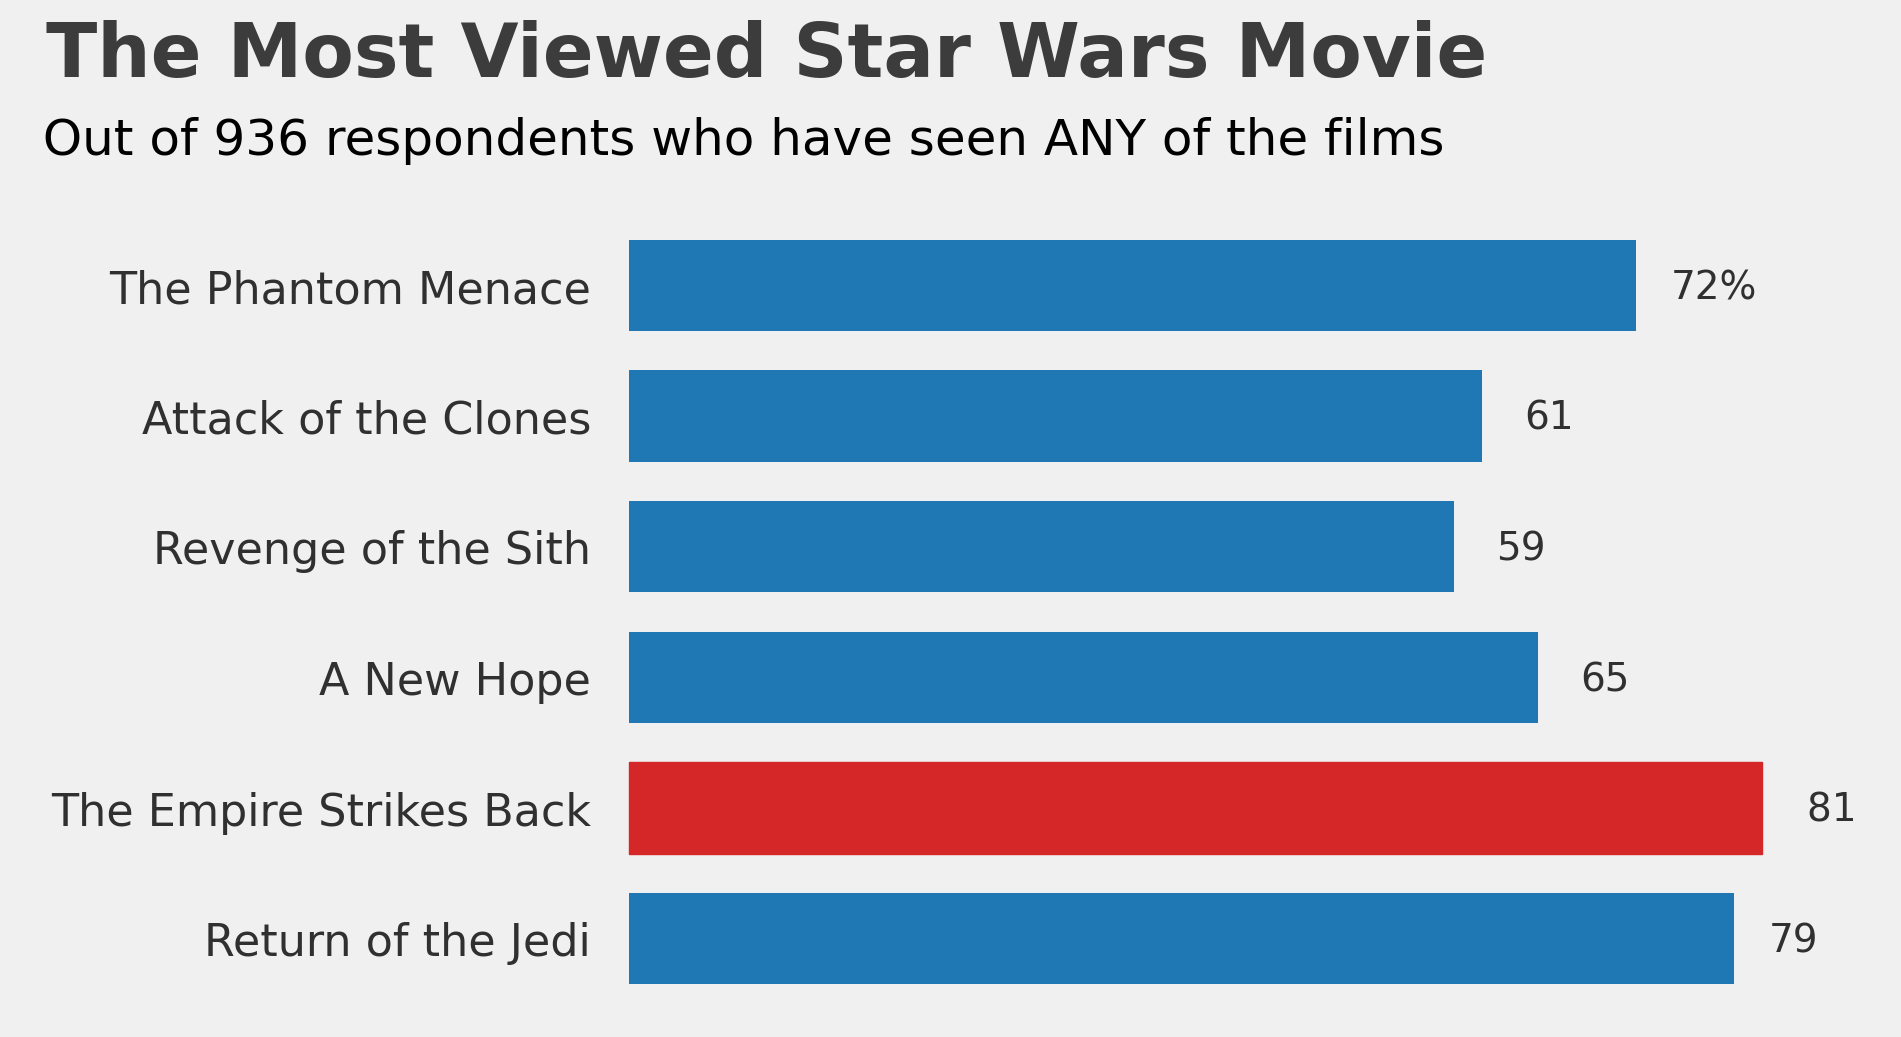

In [164]:
%config InlineBackend.figure_format ='retina' # For higher resolution graphs

# Set essential graph attributes
style.use('fivethirtyeight') # This style will apply to all our succeeding graphs

seen_graph = seen_any_df['perc'].plot.barh(figsize = (7,5), legend = False, color = '#1F77B4', width = 0.7)
seen_graph.tick_params(axis = 'both', which = 'both', labelsize = 16, labelbottom = False)
seen_graph.grid(False)
seen_graph.set_yticklabels(subtitles[0], alpha = 0.8)
seen_graph.set_xlim(left = -2) # Gives space between bars and the y-tick labels
seen_graph.get_children()[4].set_color('#D62728') # Sets a different color for 'The Empire Strikes Back'
seen_graph.invert_yaxis() # Orders the films from top (part 1) to bottom (part 6)

# Label each bar's value in percent 
seen_graph.text(x = 74.5, y = 0.1, s = '72%', alpha = 0.8)
seen_graph.text(x = 64, y = 1.1, s = '61', alpha = 0.8)
seen_graph.text(x = 62, y = 2.1, s = '59', alpha = 0.8)
seen_graph.text(x = 68, y = 3.1, s = '65', alpha = 0.8)
seen_graph.text(x = 84.2, y = 4.1, s = '81  ', alpha = 0.8)
seen_graph.text(x = 81.5, y = 5.1, s = '79', alpha = 0.8)

# Place the heading and subheading
seen_graph.text(x = -43.5, y = -1.6, s = ' The Most Viewed Star Wars Movie', fontsize = 27, weight = 'bold', alpha = 0.75)
seen_graph.text(x = -43, y = -1, s = ' Out of 936 respondents who have seen ANY of the films', fontsize = 18)

# Movie Ranking

The next thing we want to find out is which among the films the respondents consider the best. For this, we will have to be more selective of our respondents. A good criteria would be to select only those who have seen ALL of the films as they are more qualified to rank the films from best to worst.

To determine if a respondent has seen ALL six films, we will create a new column, seen_all. With an axis value of 1, the DataFrame.all() method will be used on the checkbox (seen) columns to check whether all cells in a particular row contain True. If this is the case, the value True will be returned to seen_all. If otherwise, False will be returned.

In [165]:
star_wars['seen_all'] = star_wars.iloc[:,3:9].all(axis = 1)
star_wars['seen_all'].sum()

471

Above, we see that there are 471 respondents who have seen ALL films.

As we have observed, the films were ranked on a scale of 1-6, with 1 being the highest. To determine the highest ranked film, we will count how many times each film was ranked number 1 and compare the results. Just as with our previous query, we will transpose the DataFrame and create a new column to contain the results. This time, we will use our more selective criteria for the respondents.

In [166]:
ranks_seen_all = star_wars.loc[star_wars['seen_all'] == True, star_wars.columns[9:15]].T
ranks_seen_all


,1,4,5,6,7,8,9,13,14,15,16,19,20,21,23,24,25,27,28,29,30,31,32,33,36,...,1115,1120,1122,1124,1126,1128,1129,1130,1132,1135,1143,1148,1150,1153,1155,1157,1166,1167,1172,1174,1176,1181,1182,1183,1185
ranking_1,3.0,5.0,5.0,1.0,6.0,4.0,5.0,3.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,1.0,4.0,6.0,6.0,4.0,4.0,6.0,6.0,6.0,...,6.0,3.0,1.0,1.0,1.0,3.0,4.0,5.0,4.0,6.0,4.0,6.0,3.0,6.0,6.0,3.0,5.0,6.0,6.0,5.0,1.0,3.0,5.0,4.0,4.0
ranking_2,2.0,6.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,2.0,6.0,5.0,5.0,5.0,5.0,1.0,2.0,6.0,5.0,5.0,6.0,3.0,5.0,1.0,3.0,...,5.0,2.0,4.0,5.0,5.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0,2.0,5.0,4.0,4.0,6.0,5.0,2.0,3.0,3.0,4.0,4.0,5.0,3.0
ranking_3,1.0,1.0,6.0,3.0,4.0,6.0,6.0,5.0,6.0,5.0,5.0,2.0,1.0,4.0,4.0,4.0,6.0,5.0,4.0,4.0,5.0,5.0,4.0,2.0,4.0,...,3.0,1.0,5.0,6.0,3.0,5.0,6.0,4.0,6.0,5.0,6.0,5.0,1.0,4.0,5.0,5.0,4.0,1.0,1.0,6.0,4.0,5.0,6.0,6.0,6.0
ranking_4,4.0,2.0,2.0,6.0,3.0,3.0,2.0,6.0,2.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,2.0,3.0,1.0,...,4.0,5.0,3.0,2.0,6.0,6.0,2.0,1.0,3.0,2.0,1.0,3.0,5.0,1.0,1.0,6.0,3.0,4.0,5.0,4.0,6.0,2.0,3.0,2.0,5.0
ranking_5,5.0,4.0,1.0,5.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,4.0,3.0,3.0,1.0,1.0,2.0,1.0,4.0,2.0,...,1.0,6.0,2.0,4.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,3.0,2.0
ranking_6,6.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0,6.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,1.0,1.0,3.0,3.0,1.0,3.0,5.0,5.0,...,2.0,4.0,6.0,3.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,6.0,3.0,3.0,1.0,2.0,2.0,4.0,1.0,5.0,6.0,1.0,1.0,1.0


In ranks_seen_all, we will create a new column one_count to contain the number of times each film was ranked first. Since each film is ranked uniquely by each respondent, we can simply divide each one_count value by the column's sum (equal to 471) to determine its percentage. The results are assigned to the perc column.

In [167]:
ranks_seen_all['one_count'] = (ranks_seen_all == 1).sum(axis = 1)
ranks_seen_all['perc'] = (ranks_seen_all['one_count'] / ranks_seen_all['one_count'].sum()) * 100 
ranks_seen_all['perc'] = round(ranks_seen_all['perc'])
ranks_one_df = ranks_seen_all[['one_count', 'perc']]

In [168]:
ranks_one_df # New DataFrame to be used for the visualization.

,one_count,perc
ranking_1,47,10.0
ranking_2,18,4.0
ranking_3,27,6.0
ranking_4,128,27.0
ranking_5,169,36.0
ranking_6,82,17.0


With the ranks_one_df DataFrame ready, we use the code block below to visualize our findings.

Text(-19.2, -0.9, ' According to 471 respondents who have seen ALL films')

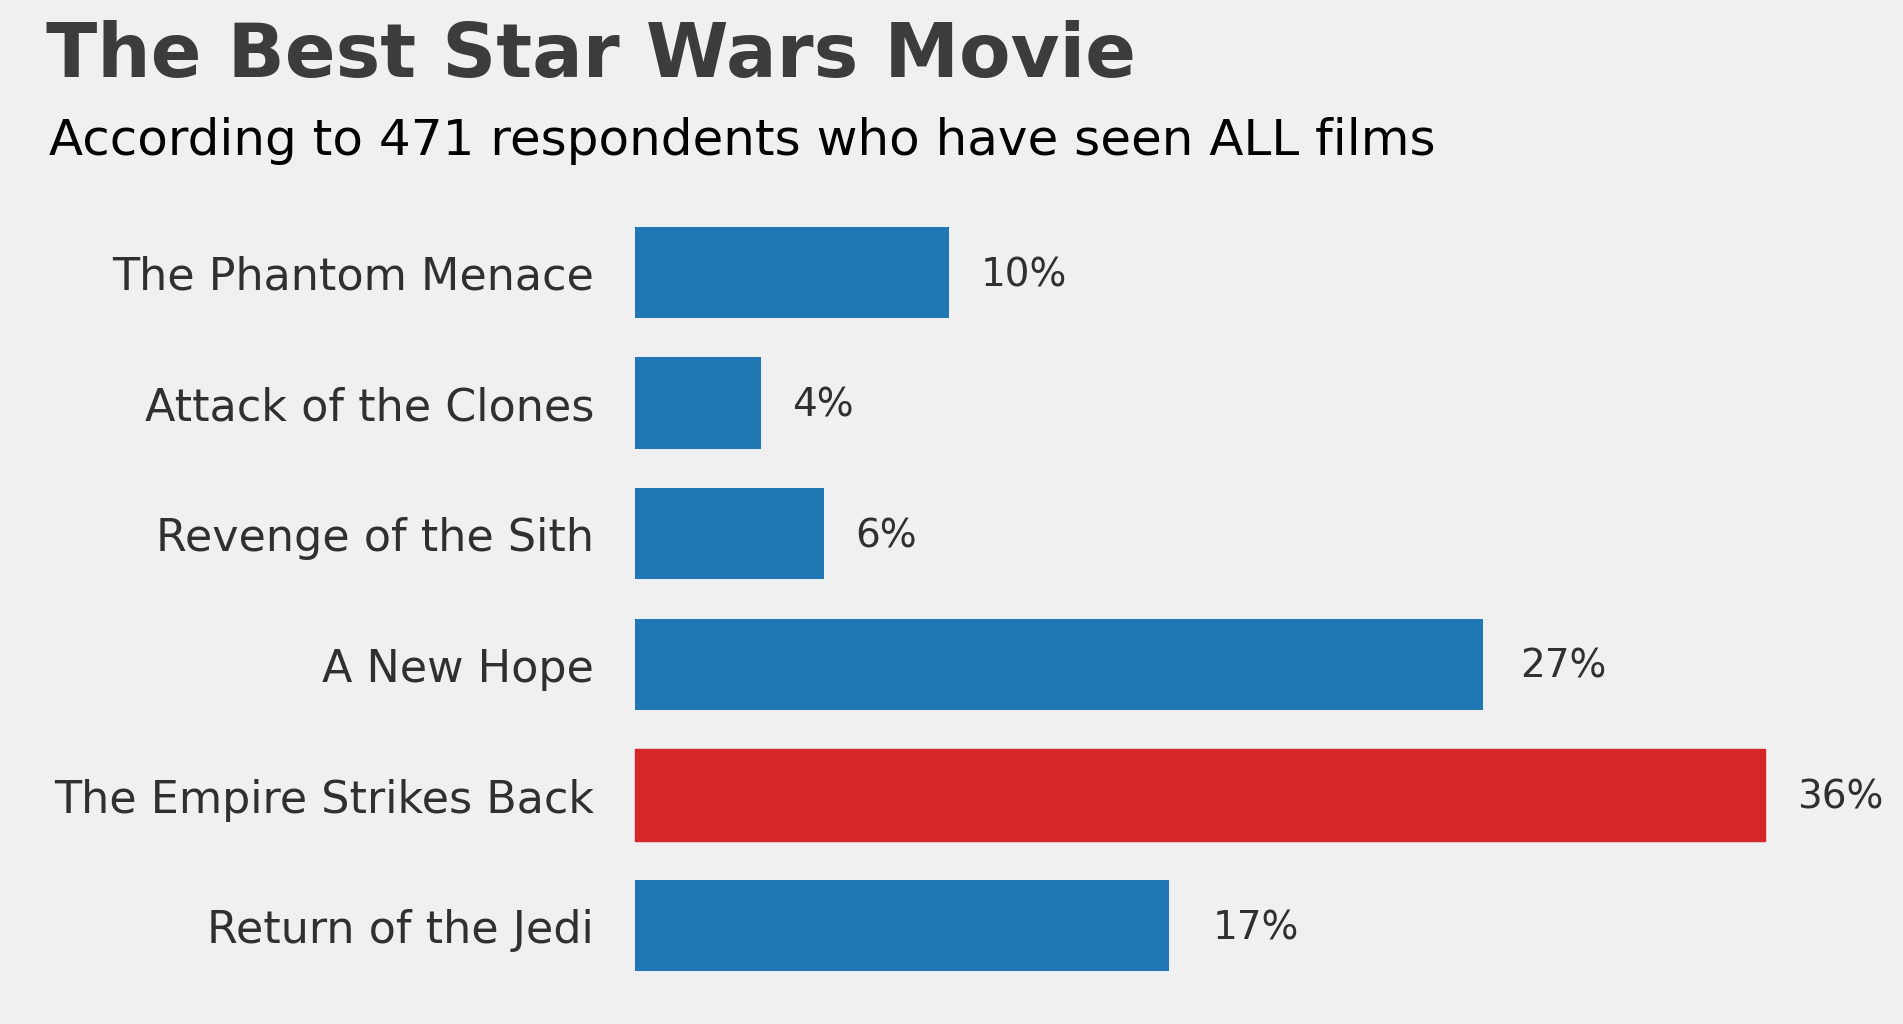

In [169]:
# Set essential graph attributes
ranks_graph = ranks_one_df['perc'].plot.barh(figsize = (7,5), legend = False, color = '#1F77B4', width = 0.7)
ranks_graph.tick_params(axis = 'both', which = 'both', labelsize = 16, labelbottom = False)
ranks_graph.grid(False)
ranks_graph.set_yticklabels(subtitles[0], alpha = 0.8)
ranks_graph.set_xlim(left = -1) # Gives space between bars and the y-tick labels
ranks_graph.get_children()[4].set_color('#D62728') # Sets a different color for 'The Empire Strikes Back'
ranks_graph.invert_yaxis() # Orders the films from top (part 1) to bottom (part 6)

# Label each bars value in percent 
ranks_graph.text(x = 11, y = 0.1, s = '10%', alpha = 0.8)
ranks_graph.text(x = 5, y = 1.1, s = '4%', alpha = 0.8)
ranks_graph.text(x = 7, y = 2.1, s = '6%', alpha = 0.8)
ranks_graph.text(x = 28.2, y = 3.1, s = '27%', alpha = 0.8)
ranks_graph.text(x = 37, y = 4.1, s = '36%', alpha = 0.8)
ranks_graph.text(x = 18.4, y = 5.1, s = '17%', alpha = 0.8)

# Place the heading and subheading
ranks_graph.text(x = -19.6, y = -1.5, s = ' The Best Star Wars Movie', fontsize = 27, weight = 'bold', alpha = 0.75)
ranks_graph.text(x = -19.2, y = -0.9, s = ' According to 471 respondents who have seen ALL films', fontsize = 18)

We can see that The Empire Strikes Back was the highest ranked at 36%, followed by A New Hope at 27%.

Even though The Empire Strikes Back was the most viewed and was considered the best among the six, these two factors are not necessarily correlated as the other five films fall in different orders when both graphs are compared. For example, Revenge of the Sith was the least viewed but is ranked 5th in the graph above.

# Character Ratings

Finally, we move on to how the respondents felt about a number of the franchise's characters in terms of favorability. We will select the answers of those respondents who have seen ANY of the film (936 respondents).

Below, we filter the dataset according to this criteria, selecting the character columns, and then transposing the filtered DataFrame. We assign the result to all_chars.

In [170]:
all_chars = star_wars.loc[star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] == True , star_wars.columns[15:29]].T
all_chars

,1,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,...,1156,1157,1159,1161,1162,1163,1164,1165,1166,1167,1168,1170,1172,1173,1174,1175,1176,1177,1178,1180,1181,1182,1183,1185,1186
Han Solo,1,1,1,1,1,1,1,1,3,4,1,1,1,1,3,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1
Luke Skywalker,1,1,1,1,1,1,1,2,1,4,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,1,1,1,1,1,3,1
Princess Leia Organa,1,1,1,1,1,1,1,1,1,4,1,1,1,1,2,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1
Anakin Skywalker,1,1,1,2,1,1,3,1,1,4,1,1,1,2,3,1,1,1,1,3,3,2,1,1,1,...,1,1,3,1,1,2,3,1,1,1,1,3,1,1,1,1,1,3,1,3,1,1,2,1,2
Obi Wan Kenobi,1,1,1,1,1,1,1,1,1,4,1,1,1,1,2,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1
Emperor Palpatine,1,4,1,2,3,1,2,1,2,4,1,4,2,1,1,1,1,2,3,3,2,1,1,1,2,...,4,1,3,1,1,1,4,1,4,2,4,1,1,3,1,4,3,3,3,3,1,1,3,3,2
Darth Vader,1,4,1,1,1,1,2,1,1,4,1,2,2,1,2,1,1,1,1,3,1,1,1,1,2,...,1,2,1,1,2,2,2,2,1,1,1,1,1,2,1,1,1,3,3,2,1,1,2,1,1
Lando Calrissian,4,4,1,3,3,1,3,1,2,4,3,4,2,1,3,3,1,2,3,3,1,3,1,1,1,...,1,3,3,1,3,3,1,1,1,4,4,1,2,3,4,4,3,3,4,3,1,1,1,1,2
Boba Fett,4,4,2,1,1,1,1,1,2,4,1,3,2,1,1,1,1,1,1,3,2,3,1,1,2,...,1,1,3,1,3,2,2,3,1,1,4,1,2,3,1,4,1,3,4,3,1,1,4,1,4
C-3P0,1,4,1,1,1,1,1,3,1,4,1,1,1,2,3,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1


Recall that we made the following divisions for the ratings:

1. Favorable
2. Unfavorable
3. Neutral
4. Unfamiliar

For each character, we will compute how many percent they fall under each division. To do this, we will have to create eight new columns. The first four will contain the total count of each favorability rating while the last four will contain their corresponding percentages.

In [171]:
favorability = ['Favorable', 'Unfavorable', 'Neutral', 'Unfamiliar']

# Create the first four columns to contain each rating's total count 
n = 0
for rating in favorability:
    n += 1
    all_chars[rating] = (all_chars == n).sum(axis = 1) # Sums the amount of `True` values for each rating
    
# Create the last four columns for the corresponding percentages 
n = 0
for rating in favorability:
    n += 1
    all_chars[rating + '_perc'] = round((all_chars[rating] / 936) * 100) # Out of the 936 respondents
    all_chars[rating + '_perc'] = all_chars[rating + '_perc'].astype(int)

char_df = all_chars.iloc[:,936:]
char_df = char_df.sort_values('Favorable', ascending = False) # Order the DataFrame by the Favorable rating

In [172]:
char_df # New DataFrame to be used for the visualization.

,Favorable,Unfavorable,Neutral,Unfamiliar,Favorable_perc,Unfavorable_perc,Neutral_perc,Unfamiliar_perc
Luke Skywalker,771,16,38,111,82,2,4,12
Han Solo,761,9,44,122,81,1,5,13
Princess Leia Organa,757,18,48,113,81,2,5,12
Obi Wan Kenobi,750,15,43,128,80,2,5,14
Yoda,749,16,51,120,80,2,5,13
R2 D2,747,16,57,116,80,2,6,12
C-3P0,703,30,79,124,75,3,8,13
Anakin Skywalker,514,122,135,165,55,13,14,18
Darth Vader,481,251,84,120,51,27,9,13
Lando Calrissian,365,71,236,264,39,8,25,28


To visualize our table, we will use the percentage columns to place four horizontal bar graphs beside each other. This will make it easy for us to compare the four favorability ratings for each character.

Below, we take the names of each character and store them in char_names.

In [173]:
char_names = char_df.index
char_names

Index(['Luke Skywalker', 'Han Solo', 'Princess Leia Organa', 'Obi Wan Kenobi',
       'Yoda', 'R2 D2', 'C-3P0', 'Anakin Skywalker', 'Darth Vader',
       'Lando Calrissian', 'Padme Amidala', 'Boba Fett', 'Emperor Palpatine',
       'Jar Jar Binks'],
      dtype='object')

The code block belows allows us to construct our desired visualization. Please refer to the comments to understand better how the combination of graphs was constructed.

C:\Users\jdgoe\AppData\Local\Temp\ipykernel_10180\3184730835.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(char_names, alpha = 0.8)
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_10180\3184730835.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(char_names, alpha = 0.8)
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_10180\3184730835.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(char_names, alpha = 0.8)
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_10180\3184730835.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(char_names, alpha = 0.8)


Text(-137, -1.9, ' Out of 936 respondents who have seen ANY of the films')

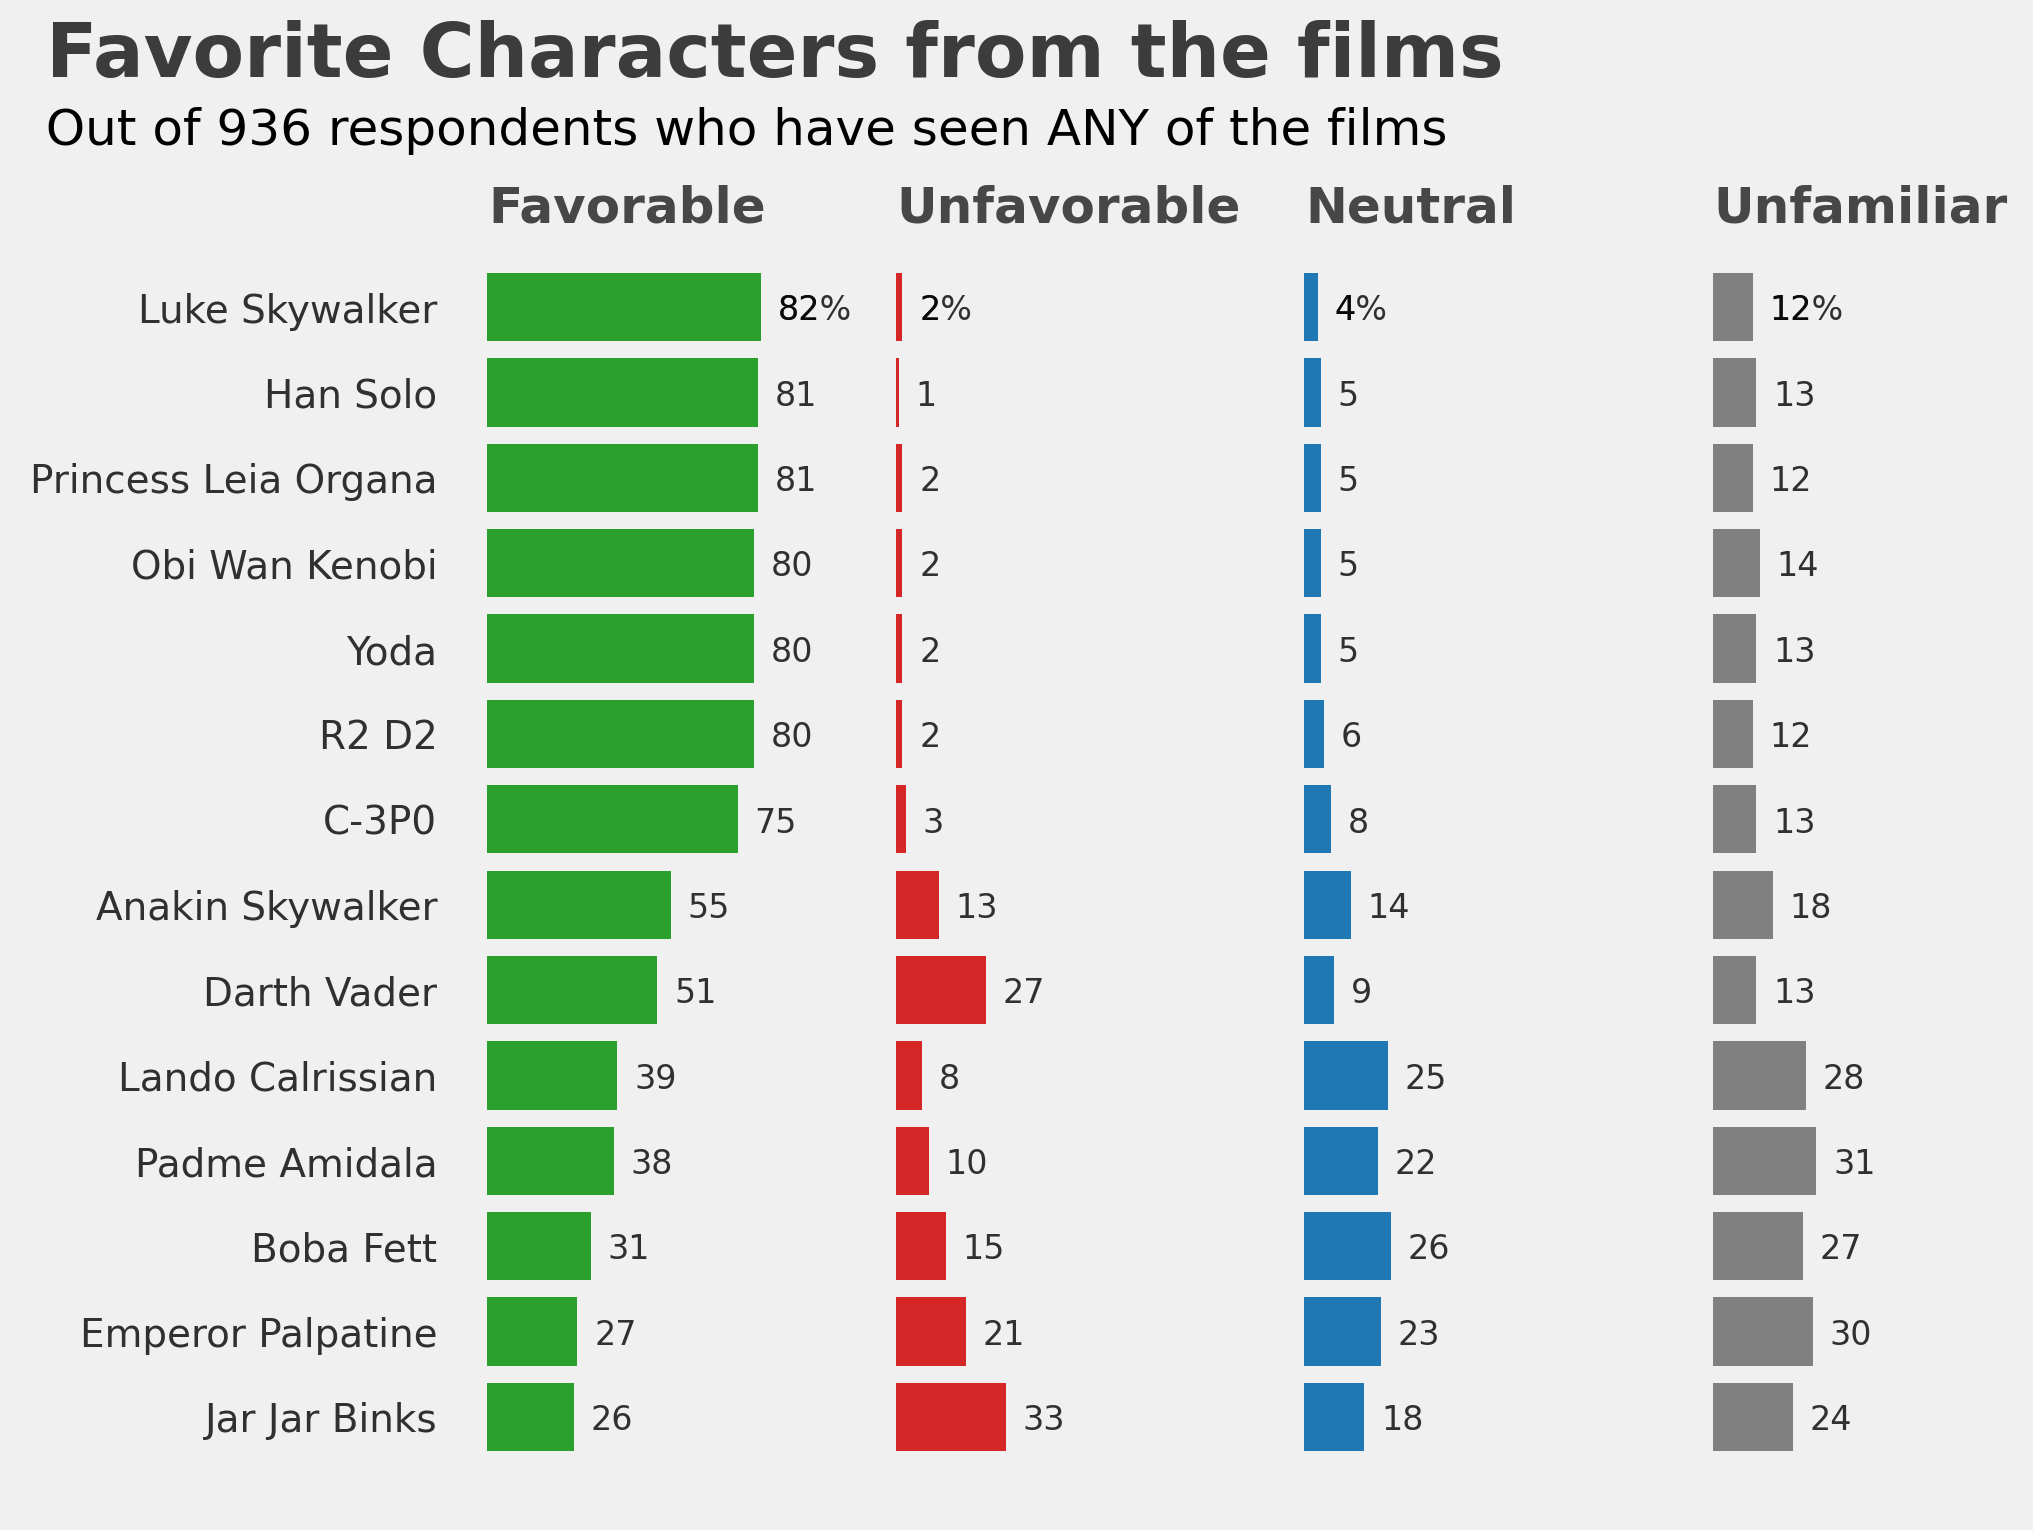

In [174]:
%config InlineBackend.figure_format = 'retina' # For higher resolution graphs

favorability = ['Favorable', 'Unfavorable', 'Neutral', 'Unfamiliar']
clrs = ['#2CA02C', '#D62728', '#1F77B4', 'grey'] # Colors to be used for each bar graph
favorability_perc = ['Favorable_perc', 'Unfavorable_perc', 'Neutral_perc', 'Unfamiliar_perc'] # Column names to extract percent values

char = plt.figure(figsize = (9, 8)) 

#Set essential attributes for each bar graph
f = 0 # For favorability list order
s = 0 # For the subplot number
for rating in favorability_perc:
    s += 1
    ax = char.add_subplot(1, 4, s)
    ax.barh(char_names, char_df[rating], color = clrs[f])
    ax.text(x = 0.2, y = -1, s = favorability[f], weight = 'bold', size = 18, alpha = 0.7)
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_xlim((-12,90)) # Gives space between bars and the y-tick labels
    ax.set_yticklabels(char_names, alpha = 0.8)
    ax.invert_yaxis()
    f += 1
    
    # Remove y-tick labels for the three other graphs
    if s != 1:
        ax.set_yticklabels([])
    
    # Bar labels in percent
    bar_labels = char_df[rating].tolist()
    y_loc = 0 # For y-location of label
    for label in bar_labels:
        
        if y_loc == 0: # Places the % symbol for only the top bar label
            ax.text(x = label + 5, y = 0.15 + y_loc,  s = str(label) + '%', alpha = 0.8, size = 12)
                
        ax.text(x = label + 5, y = 0.15 + y_loc,  s = str(label), alpha = 0.8, size = 12)
        y_loc += 1

# Places the heading and subheading
char.axes[0].text(x = -140, y = -2.7, s = ' Favorite Characters from the films', fontsize = 27, weight = 'bold', alpha = 0.75)
char.axes[0].text(x = -137, y = -1.9, s = ' Out of 936 respondents who have seen ANY of the films', fontsize = 18)

Luke Skywalker was considered as the most favored among the characters at 82%, followed by Han Solo and Princess Leia, both at 81%. At the opposite end, Jar Jar Binks was the most unfavored at 33%. His favorability was potentially diminished by 24% of the respondents who were unfamiliar with him.

# Conclusion

From the results shown by the graphs we generated, we saw that the fifth installment of the film franchise, The Empire Strikes Back, ranked at the top for both most viewed and best movie. We also saw how the characters were rated in terms of favorability, with Luke Skywalker, the main protagonist or the original Star Wars trilogy, being the most favored.